<a href="https://colab.research.google.com/github/Neancence/Apam-Training/blob/main/Apam_Training_RGB1(with%20result).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tqdm import tqdm
from keras.utils import np_utils
# DATADIR = "C:\Users\User\Desktop\Apam Lambung"

from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


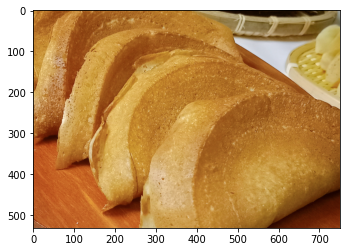

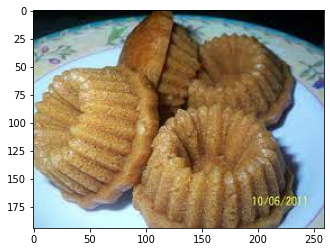

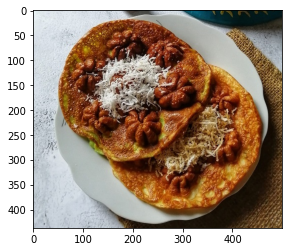

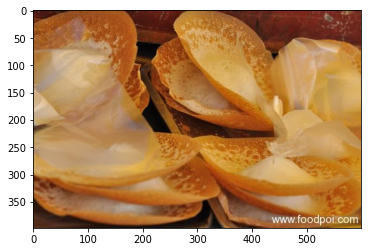

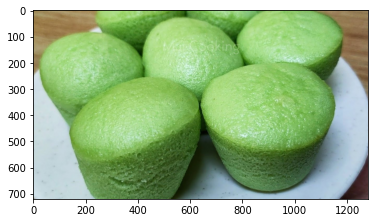

In [4]:
DATADIR = "gdrive/MyDrive/Apam Image"

CATEGORIES = ["Apam balik", "Apam gula hangus", "Apam Lambung", "apam manis", "Apam Pandan"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.cvtColor(cv2.imread(os.path.join(path,img)), cv2.COLOR_BGR2RGB)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [5]:
print(img_array)

[[[161 133  83]
  [159 131  81]
  [157 130  77]
  ...
  [141 119  80]
  [144 122  83]
  [147 125  86]]

 [[161 133  83]
  [159 131  81]
  [157 130  77]
  ...
  [144 122  83]
  [145 123  84]
  [147 125  86]]

 [[159 133  82]
  [158 132  81]
  [156 130  79]
  ...
  [147 125  86]
  [147 125  86]
  [146 124  85]]

 ...

 [[149 144 125]
  [152 149 130]
  [161 158 143]
  ...
  [101  75  78]
  [100  74  77]
  [ 99  73  76]]

 [[144 137 118]
  [148 143 123]
  [154 148 132]
  ...
  [ 98  72  75]
  [ 99  70  74]
  [ 98  69  73]]

 [[140 134 112]
  [144 137 118]
  [148 142 126]
  ...
  [102  76  79]
  [103  74  78]
  [102  73  77]]]


In [6]:
print(img_array.shape)

(720, 1280, 3)


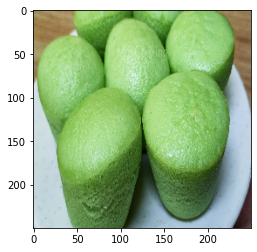

In [7]:
IMG_SIZE = 250

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [12]:

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.cvtColor(cv2.imread(os.path.join(path,img)), cv2.COLOR_BGR2RGB)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print("")
print(len(training_data))

100%|██████████| 50/50 [00:00<00:00, 93.49it/s]


250


In [13]:
import random

random.shuffle(training_data)

index = 1
for sample in training_data:
  print(str(index) + "->" + str(sample[1]))
  index = index + 1

1->3
2->1
3->1
4->1
5->3
6->1
7->2
8->3
9->4
10->3
11->1
12->4
13->3
14->4
15->0
16->0
17->2
18->0
19->0
20->0
21->3
22->3
23->1
24->4
25->0
26->4
27->4
28->2
29->4
30->2
31->2
32->1
33->1
34->0
35->1
36->2
37->2
38->0
39->3
40->0
41->3
42->1
43->4
44->1
45->1
46->0
47->4
48->4
49->3
50->0
51->3
52->3
53->1
54->4
55->0
56->4
57->3
58->4
59->0
60->2
61->2
62->1
63->1
64->0
65->2
66->4
67->2
68->4
69->3
70->1
71->2
72->4
73->2
74->1
75->2
76->3
77->2
78->2
79->2
80->1
81->0
82->4
83->1
84->4
85->4
86->0
87->3
88->0
89->4
90->3
91->3
92->1
93->3
94->1
95->0
96->3
97->1
98->2
99->0
100->4
101->1
102->2
103->1
104->0
105->4
106->4
107->3
108->3
109->4
110->0
111->0
112->3
113->1
114->4
115->0
116->2
117->3
118->2
119->1
120->1
121->2
122->0
123->2
124->1
125->0
126->0
127->0
128->2
129->1
130->4
131->1
132->2
133->2
134->2
135->3
136->0
137->0
138->4
139->4
140->2
141->2
142->3
143->4
144->4
145->2
146->1
147->2
148->0
149->1
150->4
151->4
152->0
153->2
154->4
155->3
156->3
157->0
158->2
15

In [14]:

X = []
y = []
labelArray = np.empty(len(training_data), dtype=int)
counter = 0
for features, label in training_data:
  X.append(features)
  #y.append(label)
  labelArray[counter] = label
  counter+=1

encoder = LabelEncoder()
encoder.fit(labelArray)
encoded_Y = encoder.transform(labelArray)
# convert integers to dummy variables (i.e. one hot encoded)
y = np_utils.to_categorical(encoded_Y)

print(y)

[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [15]:
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 3))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)
X = X/255.0

[[[[ 27  26  22]
   [ 33  23  24]
   [ 30  25  21]
   ...
   [122 135 167]
   [127 136 169]
   [132 138 171]]

  [[ 34  29  29]
   [ 30  29  25]
   [ 29  28  24]
   ...
   [127 140 174]
   [121 136 169]
   [128 133 171]]

  [[ 27  28  27]
   [ 27  25  26]
   [ 33  27  27]
   ...
   [124 140 173]
   [131 140 173]
   [133 138 177]]

  ...

  [[ 42  57 103]
   [ 46  56 101]
   [ 40  53  96]
   ...
   [ 36  48  74]
   [ 38  47  78]
   [ 46  46  82]]

  [[ 48  62 111]
   [ 40  57 107]
   [ 45  59 106]
   ...
   [ 43  49  81]
   [ 47  51  82]
   [ 42  51  81]]

  [[ 49  59 110]
   [ 44  65 114]
   [ 45  66 109]
   ...
   [ 50  53  84]
   [ 48  52  87]
   [ 46  52  84]]]]


In [16]:
#model = create_model()

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()
model.add(keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3)))  # 250x250 RGB images
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      9248      
________________________________

In [17]:
history = model.fit(X, y, validation_split=0.3, epochs=50, batch_size=50)

Epoch 1/50
4/4 [==============================] - 9s 2s/step - loss: 1.6093 - accuracy: 0.2671 - val_loss: 1.5993 - val_accuracy: 0.1867
Epoch 2/50
4/4 [==============================] - 8s 2s/step - loss: 1.5883 - accuracy: 0.2493 - val_loss: 1.5561 - val_accuracy: 0.4000
Epoch 3/50
4/4 [==============================] - 8s 2s/step - loss: 1.5403 - accuracy: 0.4030 - val_loss: 1.5103 - val_accuracy: 0.3867
Epoch 4/50
4/4 [==============================] - 8s 2s/step - loss: 1.4683 - accuracy: 0.4676 - val_loss: 1.3625 - val_accuracy: 0.3733
Epoch 5/50
4/4 [==============================] - 8s 2s/step - loss: 1.2928 - accuracy: 0.4450 - val_loss: 1.3910 - val_accuracy: 0.3067
Epoch 6/50
4/4 [==============================] - 8s 2s/step - loss: 1.2256 - accuracy: 0.4045 - val_loss: 1.0948 - val_accuracy: 0.4933
Epoch 7/50
4/4 [==============================] - 8s 2s/step - loss: 1.0426 - accuracy: 0.6086 - val_loss: 1.0467 - val_accuracy: 0.5600
Epoch 8/50
4/4 [=========================

Text(0.5, 0, 'epoch')

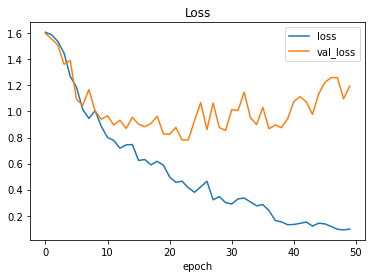

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

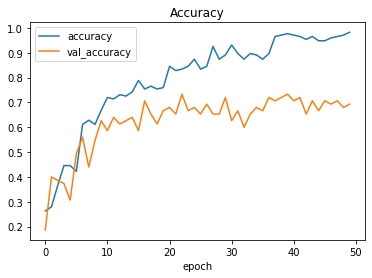

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [21]:
history = model.evaluate(X, y, verbose=1)

8/8 [==============================] - 3s 320ms/step - loss: 0.4260 - accuracy: 0.8920
